In [2]:
#MAKE_volcano_plot_Rscript
#
#Designed to make volcano plot for every omics data (proteomics, metabolomics, autoantibody) 
#and every comparison (negVSpos, cVSpos, cVSneg, cVSra)
#
#Note: [1] P-value threshold for autoantibody : 0.05
#      [2] P-value threshold for autoantibody : 0.01

library(ggplot2)
library(ggrepel)

In [3]:
omics_list = c("autoantibody")
condition_list = c("negVSpos","cVSpos","cVSneg","cVSra")

for (omics in omics_list){
    
    for (condition in condition_list){
        
        data_file = paste("../../../analysis/statistics/linear_model/differential_abundance/", 
                          omics, ".", condition,".padj.v2.tsv", sep="")
        input_df = read.csv(data_file, sep="\t", header=TRUE, row.names=1)
        
        x_axis <- input_df$fc_case_control
        y_axis <- -log10(input_df$pval)
        cohenD <- input_df$cohenD
        
        if (condition == "negVSpos"){
            xaxis_label <- "log2FC (ACPA-positive/ACPA-negative)"
        }
        if (condition == "cVSpos"){
            xaxis_label <- "log2FC (ACPA-positive/Control)"
        }
        if (condition == "cVSneg"){
            xaxis_label <- "log2FC (ACPA-negative/Control)"
        }
        if (condition == "cVSra"){
            xaxis_label <- "log2FC (RA/control)"
        }

        gene_list <- rownames(input_df)
        
        #make dataframe for volcano plot
        #row names = gene list
        df <- do.call(rbind, Map(data.frame, 'log2FC'=x_axis, 'pval'=y_axis, 'cohenD'=cohenD))
        rownames(df) <- gene_list
        df$genes <- row.names(df)
        

        #Thresholds for data points color
        #pvalue 0.01 = 2 (-log10 pval)
        sig_subset <- subset(df, pval > 2)
        
        if (omics == "autoantibody"){ #since we decided to change the threshold of autoantibody profiles
            sig_subset <- subset(df, pval > 1.30103)
        }

        #filter out by Cohen's D
        sig_subset <- subset(sig_subset, cohenD > 0.2)
        
        #assign color of the dot (feature)
        sig_red_subset <- subset(sig_subset, log2FC > 0) 
        sig_blue_subset <- subset(sig_subset, log2FC < 0)
                
        sig_red_text_subset <- subset(sig_subset, log2FC > 0)
        sig_blue_text_subset <- subset(sig_subset, log2FC < 0)
        
        #Debug
        print ('#####')
        print (omics)
        print (condition)
        print (nrow(sig_red_subset))
        print (nrow(sig_blue_subset))
        print ('#####')
        #Debug
        
        
        figure_title = paste(omics,": ", condition, sep="")
        
        output_pdf = paste("../../../analysis/statistics/volcano_plots/", omics,
                            ".", condition, ".volcano.label.alternative.pdf", sep="")
        pdf(output_pdf)
        plot_pdf <- ggplot(df, aes(x=log2FC, y=pval))+ coord_cartesian(xlim=c(-2,2))+ 
        geom_point(colour="grey") + 
        geom_point(data = sig_red_subset, colour="red") +
        geom_point(data = sig_blue_subset, colour="blue") +
        geom_text_repel(data=sig_red_text_subset, aes(log2FC, pval, label=genes), colour="red", size=2) +
        geom_text_repel(data=sig_blue_text_subset, aes(log2FC, pval, label=genes), colour="blue", size=2) +
        ylab("-Log10 (P-value)") + xlab(xaxis_label)
        ggtitle(figure_title)
        print (plot_pdf)
        # dev.off()
        break
    }
    break
}

[1] "#####"
[1] "autoantibody"
[1] "negVSpos"
[1] 104
[1] 75
[1] "#####"


Warning message:
“ggrepel: 89 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 50 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


Warning message:
“ggrepel: 89 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 50 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


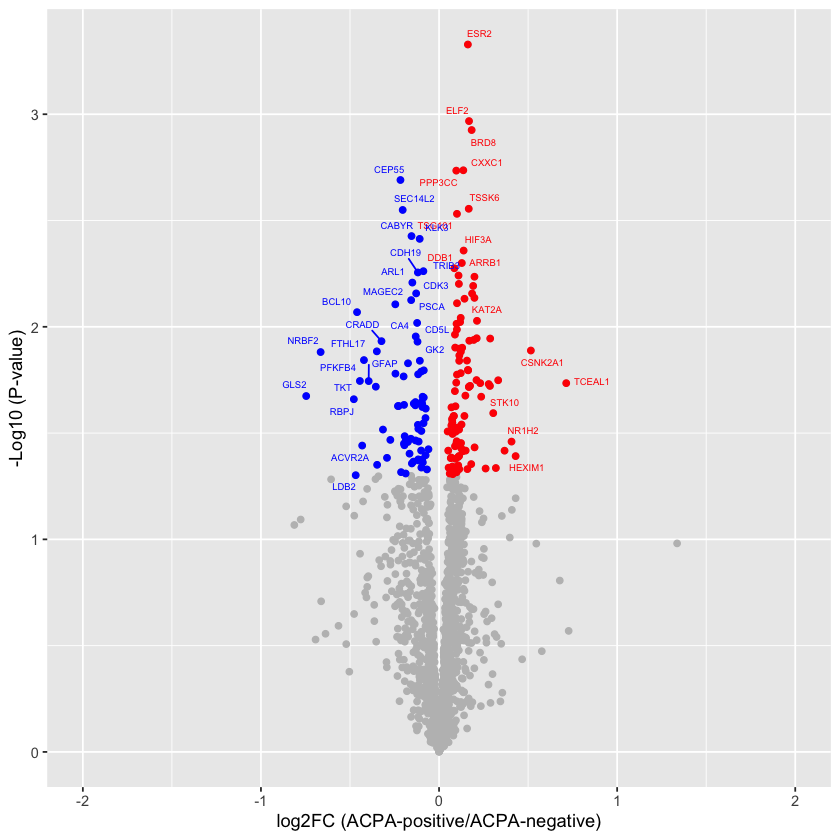

In [4]:
plot_pdf